Email Classification (Ham-Spam)

https://www.kaggle.com/datasets/prishasawhney/email-classification-ham-spam



In [28]:
import pandas as pd
import nltk
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Write your code here
from google.colab import files
files.upload()


Saving email_classification.csv to email_classification.csv


{'email_classification.csv': b'email,label\r\nUpgrade to our premium plan for exclusive access to premium content and features.,ham\r\nHappy holidays from our team! Wishing you joy and prosperity this season.,ham\r\nWe\'re hiring! Check out our career opportunities and join our dynamic team.,ham\r\nYour Amazon account has been locked. Click here to verify your account information.,spam\r\nYour opinion matters! Take our survey and help us enhance your experience.,ham\r\nYour payment has been received. Thank you for your prompt transaction.,ham\r\nYour email account storage is full. Click here to upgrade your account.,spam\r\n"Dear [Name], thank you for subscribing to our newsletter. Here\'s your welcome gift!",ham\r\nYour account has been credited with loyalty points. Redeem them for exciting rewards!,ham\r\nYou\'ve been chosen for a free iPhone. Click here to claim your prize!,spam\r\nDon\'t miss out on our special offer! Sign up now and get a discount on your first purchase.,ham\r\nWe

In [3]:
data=pd.read_csv(open('email_classification.csv',))

# **`Data Pre-processing`**

In [24]:

print(data.head())
print(data.tail())
print('Shape of the DataFrame:', data.shape)# shape of the DataFrame
print('Column names:', data.columns.tolist())# column names of the DataFrame
print(data.dtypes)# data types of each column
print(data.info())

print(data.describe())# statistical summary for numerical columns
print(data['label'].value_counts())# Display the count of 'Ham' and 'Spam' in the 'Label' column



                                               email  label
0  upgrad premium plan exclu access premium conte...      0
1         happi holiday team wish joy prosper season      0
2         hire check career opportun join dynam team      0
3    amazon account lock click verifi account inform      1
4   opinion matter take survey help us enhanc experi      0
                                                 email  label
174                 plea inform refund process success      0
175  get rich quick invest revolutionari new scheme...      1
176  free trial period end soon upgrad continu enjo...      0
177           order way track shipment real time updat      0
178          limit time offer get 50 purcha today miss      1
Shape of the DataFrame: (179, 2)
Column names: ['email', 'label']
email    object
label     int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  ---

In [25]:
# Check for missing values
print(data.isnull().sum())




email    0
label    0
dtype: int64


In [5]:
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])# Fit and transform the 'label' column
print(data.head())


                                               email  label
0  Upgrade to our premium plan for exclusive acce...      0
1  Happy holidays from our team! Wishing you joy ...      0
2  We're hiring! Check out our career opportuniti...      0
3  Your Amazon account has been locked. Click her...      1
4  Your opinion matters! Take our survey and help...      0


The ‘0’ represents ‘Ham’ (non-spam) and ‘1’ represents ‘Spam’.

In [29]:
nltk.download('punkt')
nltk.download('stopwords')#download the NLTK English stopwords and tokenizer

# Initialize a Porter stemmer
stemmer = PorterStemmer()
def preprocess_text(text):

    text = text.lower() # Convert to lowercase
    text = re.sub(r'\W', ' ', text)# Remove punctuation and non-alphanumeric characters
    text = re.sub(r'\s+', ' ', text)# Replace multiple spaces with a single space
    words = word_tokenize(text) # Tokenize the text
    words = [stemmer.stem(word) for word in words if word not in stopwords.words('english')]# Remove stopwords and stem the words
    text = ' '.join(words) # Join the words back into a single string
    return text
data['email'] = data['email'].apply(preprocess_text)# Apply the preprocessing function to the 'email' column
print(data.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               email  label
0  upgrad premium plan exclu access premium conte...      0
1         happi holiday team wish joy prosper season      0
2         hire check career opportun join dynam team      0
3    amazon account lock click verifi account inform      1
4   opinion matter take survey help us enhanc experi      0


In [30]:
vectorizer = TfidfVectorizer()#TF-IDF Vectorizer
features = vectorizer.fit_transform(data['email'])# Fit and transform the 'email' column

In [20]:
X = features  # Features (TF-IDF vectors)
y = data['label']  # Labels (Ham or Spam)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#training and test sets


In [31]:


#Logistic Regression model
model = LogisticRegression()
#Train the model with training data
model.fit(X_train, y_train)
predictions = model.predict(X_test)#unseen data x_test
#model evaluation
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.91      0.95        22

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



model performed quite well with an accuracy of 94%. It was perfect in identifying ham emails and very good (91% recall) at catching spam. The F1 scores are also quite high, indicating a good balance between precision and recall.

Confusion Matrix:
 [[14  0]
 [ 2 20]]


Text(95.72222222222221, 0.5, 'Truth')

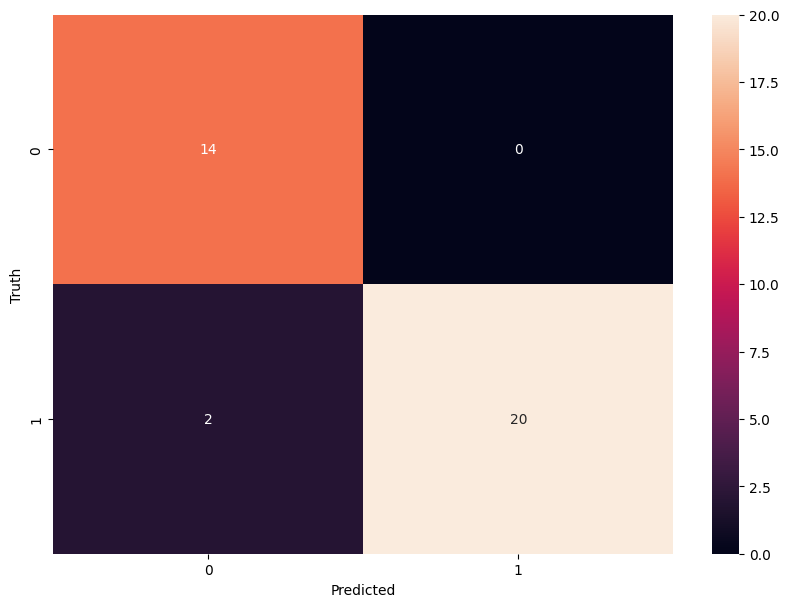

In [32]:
# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)
# For better visualization,use seaborn to plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
